# Yelp Data Challenge - NLP

CS 753



* Compare different model's performance for NLP (Bayes, Logistics,Random Forest)
* Compare different model's performance between hand turn and grid search
* Compare different NLP results between Pittsurgh and Las Vegas

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfpitts = pd.read_csv('Dataset/pittsrestfinallast2year.csv') 

In [76]:
dflas = pd.read_csv('Dataset/lasvegasrestfinallast2year.csv')

In [73]:
# dflas.head(2)
dfpitts.head(5)

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,target
0,2,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-05,0,isswD5jO3GwCYIkDNK9AEA,4,I love the white pizza and the Monongahela (bl...,0,D5_iQw0N9wO7kT7FrT7j6A,False
1,11,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-07-31,0,CRMppAp7f0GF5pa8sNkV4g,5,love Primanti bros.great food. good service. f...,0,nyzncOg3goSAMK15IijIqA,True
2,12,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-03-25,0,BdGR_xduQ2CLkEIgtR2eCQ,4,Great food and very convenient location. The p...,0,YFRp9i9sDuA1T5oMKq5cbg,False
3,18,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-12-31,0,Jt2iThRe8Fu6GAG-moAIPQ,3,I love visiting Primanti Bros every time we co...,0,QqdHAP9tSwjteG7b9q7sAw,False
4,20,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-09-27,0,1mi5-2nKgRQ0u6KoWXA3vQ,5,You can't beat their happy hour! Great sandwic...,0,4qfMMlGtme2RNFqDgxYLxg,True


### Define your feature variables, here is the text of the review

In [4]:
documentspitts = dfpitts['text'].values
documentslas = dflas['text'].values

In [5]:
print(documentspitts.shape, documentspitts.dtype)
# print(documentslas.shape, documentspitts.dtype)

(49142,) object
(365550,) object


### Define target variable 

### perfect (5 stars) and imperfect (1-4 stars) rating

In [11]:
# Make a column and take the values, save to a variable named "target"
# 
dfpitts['target'] = dfpitts['stars'] == 5
targetpitts = dfpitts['target'].values
targetpitts[:5]

array([False,  True, False, False,  True])

#### Look at the statistic of the target variable

In [12]:
dfpitts.target.mean()

0.43235928533637213

## Let's create training dataset and test dataset

In [13]:
from sklearn.cross_validation import train_test_split

/home/cs7532018fall/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Documents is your X, target is your y
# Now split the data to training set and test set
documentspitts_train, documentspitts_test, targetpitts_train, targetpitts_test = train_test_split(
    documentspitts, targetpitts, test_size = 0.7, random_state = 42)

## Let's get NLP representation of the documents

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cs7532018fall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000)

# Train the model with training data
vectors_train = tfidf_vectorizer.fit_transform(documentspitts_train).toarray()

# Get the vocab of tfidf
wordspitts = tfidf_vectorizer.get_feature_names()

# Use the trained model to transform test data
vectors_test = tfidf_vectorizer.transform(documentspitts_test).toarray()

In [20]:
wordspitts

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '20',
 '25',
 '2nd',
 '30',
 '35',
 '40',
 '45',
 '50',
 '75',
 '90',
 '99',
 'able',
 'absolute',
 'absolutely',
 'accept',
 'accommodate',
 'accommodating',
 'across',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'advance',
 'affordable',
 'afternoon',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'aioli',
 'air',
 'airport',
 'al',
 'alcohol',
 'allow',
 'allowed',
 'almond',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'amazing',
 'ambiance',
 'ambience',
 'american',
 'among',
 'amount',
 'ample',
 'anniversary',
 'annoyed',
 'annoying',
 'another',
 'answer',
 'answered',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apologized',
 'apology',
 'app',
 'apparently',
 'appeared',
 'appetizer',
 'appetizers',
 'apple',
 'appreciate',
 'appreciated',
 'appropriate',
 'apps',

## Similar review search engine

In [46]:
# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]


In [22]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
# Draw an arbitrary review from test (unseen in training) documents
random_number = 20
search_query = [documentspitts_test[random_number]]
print(search_query)

["My wife and I came here on a freezing cold late Saturday afternoon.  We found street parking and rushed to get inside.  It wasn't too busy when we first got here.  We were greeted by the hostess and sat right down at a two seater.\n\n We had looked over the menu a little bit before we came here so we sort of knew what we wanted.  Our waitress was nice and she came over to ask us if we had ever been here before and if we would like her to explain the menu.  We let her and she did a good job explaining everything to us.\n\n We ordered their Meat Bao bun that had Oyster in it to start us off.  For our main dish I ordered the Shoyu Ramen and my wife got the Inferno Ramen.\n \nOur Bao came out within 10 minutes.  It looked good. Our waitress said that if we were sharing it they would cut it in half for us but they didn't but  no big deal we cut it and shared the bun.  The actually bun was good but we felt that it needed more filling.  It was a lot more bun and less Oyster.  It was good bu

In [24]:
# Transform the drawn resview(s) to vector(s)
vector_search_query = tfidf_vectorizer.transform(search_query).toarray()

# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_search_query, vectors_train)

In [26]:
vectors_train.shape

(14742, 2000)

In [27]:
vectors_test.shape

(34400, 2000)

In [28]:
similarity_scores.shape 

(1, 14742)

In [29]:
# Let's find top 10 similar reviews
n = 10
top_similar_reviews = get_top_values(similarity_scores[0], n, documentspitts_train)

In [30]:
print('Our search query:')
print(search_query[0]) 

Our search query:
My wife and I came here on a freezing cold late Saturday afternoon.  We found street parking and rushed to get inside.  It wasn't too busy when we first got here.  We were greeted by the hostess and sat right down at a two seater.

 We had looked over the menu a little bit before we came here so we sort of knew what we wanted.  Our waitress was nice and she came over to ask us if we had ever been here before and if we would like her to explain the menu.  We let her and she did a good job explaining everything to us.

 We ordered their Meat Bao bun that had Oyster in it to start us off.  For our main dish I ordered the Shoyu Ramen and my wife got the Inferno Ramen.
 
Our Bao came out within 10 minutes.  It looked good. Our waitress said that if we were sharing it they would cut it in half for us but they didn't but  no big deal we cut it and shared the bun.  The actually bun was good but we felt that it needed more filling.  It was a lot more bun and less Oyster.  It w

In [31]:
print('query')
print(search_query)  

print('\n\nMost %s similar reviews:' % n)
for i, review in enumerate(top_similar_reviews):
    print('#%s:' % i)
    print(review)

query
["My wife and I came here on a freezing cold late Saturday afternoon.  We found street parking and rushed to get inside.  It wasn't too busy when we first got here.  We were greeted by the hostess and sat right down at a two seater.\n\n We had looked over the menu a little bit before we came here so we sort of knew what we wanted.  Our waitress was nice and she came over to ask us if we had ever been here before and if we would like her to explain the menu.  We let her and she did a good job explaining everything to us.\n\n We ordered their Meat Bao bun that had Oyster in it to start us off.  For our main dish I ordered the Shoyu Ramen and my wife got the Inferno Ramen.\n \nOur Bao came out within 10 minutes.  It looked good. Our waitress said that if we were sharing it they would cut it in half for us but they didn't but  no big deal we cut it and shared the bun.  The actually bun was good but we felt that it needed more filling.  It was a lot more bun and less Oyster.  It was g

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [32]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()

model_nb.fit(vectors_train, targetpitts_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# Get score for training set
model_nb.score(vectors_train, targetpitts_train)

0.8036901370234704

In [34]:
# Get score for test set
model_nb.score(vectors_test, targetpitts_test)

0.778546511627907

#### Logistic Regression Classifier

In [35]:
targetpitts_train.shape

(14742,)

In [36]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()
model_lrc.fit(vectors_train, targetpitts_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# Get score for training set
model_lrc.score(vectors_train, targetpitts_train)

0.8355718355718356

In [39]:
# Get score for test set
model_lrc.score(vectors_test, targetpitts_test)

0.7970639534883721

#### Q: What are the key features(words) that make the positive prediction?

In [42]:
# Let's find it out by ranking
n = 50
get_top_values(model_lrc.coef_[0], n, wordspitts)

['amazing',
 'best',
 'delicious',
 'great',
 'incredible',
 'awesome',
 'excellent',
 'fantastic',
 'wonderful',
 'perfect',
 'everything',
 'favorite',
 'perfection',
 'recommend',
 'pittsburgh',
 'absolutely',
 'perfectly',
 'thank',
 'highly',
 'must',
 'gem',
 'phenomenal',
 'omg',
 'every',
 'everyone',
 'love',
 'outstanding',
 'definitely',
 'glad',
 'life',
 'loved',
 'knowledgeable',
 'pgh',
 'world',
 'vegan',
 'owner',
 'die',
 'fabulous',
 'bomb',
 'heaven',
 'oysters',
 'notch',
 'top',
 'divine',
 'ever',
 'taiwanese',
 'welcoming',
 'chef',
 'stuff',
 'place']

#### Q: What are the key features(words) that make the negative prediction?

In [48]:
# Let's find it out by ranking
n = 30
get_bottom_values(model_lrc.coef_[0], n, wordspitts)


['ok',
 'however',
 'okay',
 'bland',
 'average',
 'worst',
 'horrible',
 'rude',
 'dry',
 'unfortunately',
 'mediocre',
 'terrible',
 'disappointing',
 'slow',
 'pretty',
 'would',
 'overpriced',
 'awful',
 'though',
 'nothing',
 'used',
 'reason',
 'seemed',
 'decent',
 'said',
 'bad',
 'star',
 'overall',
 'told',
 'lacking']

#### Random Forest Classifier

In [50]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth = 25, n_estimators = 200, random_state = 42)

model_rfc.fit(vectors_train, targetpitts_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [51]:
# Get score for training set
model_rfc.score(vectors_train, targetpitts_train)

0.9221950888617555

In [52]:
# Get score for test set
model_rfc.score(vectors_test, targetpitts_test)

0.7656395348837209

#### Q: What do you see from the training score and the test score?


The trainng score and the test score are comparable, seems no negative impact of overfitting. 

And the scores fo Random forest are slightly better than Logistic regression. If the data size is larger, the advantage fo Random forest may be more obvious.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [54]:
n = 50
get_top_values(model_rfc.feature_importances_, n, wordspitts)

['amazing',
 'best',
 'great',
 'delicious',
 'pittsburgh',
 'ok',
 'excellent',
 'would',
 'fantastic',
 'good',
 'awesome',
 'pretty',
 'highly',
 'ordered',
 'love',
 'however',
 'favorite',
 'recommend',
 'bad',
 'minutes',
 'told',
 'perfect',
 'nothing',
 'everything',
 'definitely',
 'like',
 'asked',
 'bland',
 'average',
 'worst',
 'terrible',
 'friendly',
 'decent',
 'wonderful',
 'always',
 'place',
 'said',
 'fresh',
 'slow',
 'seemed',
 'horrible',
 'dry',
 'okay',
 'disappointing',
 'though',
 'rude',
 'bit',
 'order',
 'incredible',
 'food']

##  Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [55]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [56]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
#    clf.fit(X_train, y_train)
# fitted outside already

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [57]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### cross validation for Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegressionCV

model_lrc_cv = LogisticRegressionCV(10)

model_lrc_cv.fit(vectors_train, targetpitts_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

              train      test
metrics                      
AUC        0.926935  0.878283
Accuracy   0.845204  0.792878
Precision  0.822777  0.764301
Recall     0.817868  0.753461
f1-score   0.820315  0.758842


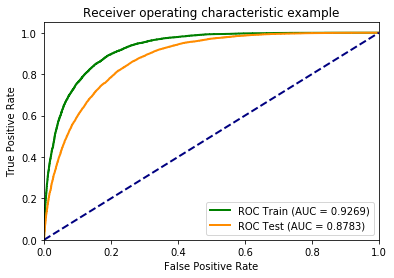

In [60]:
# Train test model
train_test_model(model_lrc_cv, vectors_train, targetpitts_train, vectors_test, targetpitts_test)


#### Random Forest has no need to do cross-validation, we use build-in out-of-bag scores

In [62]:
# Build a Random Forest Classifier with oob_score

model_rfc_oob = RandomForestClassifier(oob_score = True, max_depth = 25, n_estimators = 40, random_state = 42)

model_rfc_oob.fit(vectors_train, targetpitts_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.977830  0.844752
Accuracy   0.914801  0.760407
Precision  0.917388  0.764088
Recall     0.882242  0.645248
f1-score   0.899472  0.699657


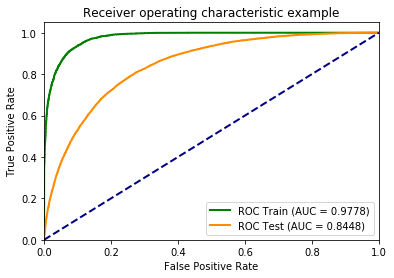

In [64]:
# Train test model
train_test_model(model_rfc_oob, vectors_train, targetpitts_train, vectors_test, targetpitts_test)

## Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### Calculate the metric scores for the model

###  Use grid search to find best Logistic Regression classifier

In [66]:
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
model_lrc_grid = LogisticRegression()

# Choose some parameter combinations to try
param_grid_lrc = {
                 'penalty': ['l1', 'l2']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_lrc = GridSearchCV(model_lrc_grid, param_grid_lrc, cv=5, scoring=acc_scorer)
grid_lrc = grid_lrc.fit(vectors_train, targetpitts_train)

# Set the model_lrc_grid to the best combination of parameters
model_lrc_grid = grid_lrc.best_estimator_

# Fit the best algorithm to the data. 
model_lrc_grid.fit(vectors_train, targetpitts_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.918081  0.881900
Accuracy   0.835572  0.797064
Precision  0.816461  0.775176
Recall     0.799027  0.747614
f1-score   0.807650  0.761146


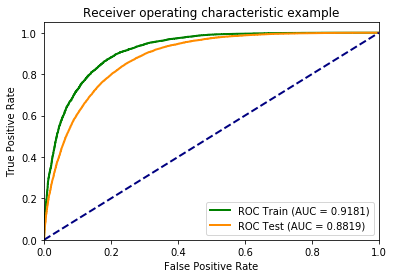

In [67]:
# Train test model
train_test_model(model_lrc_grid, vectors_train, targetpitts_train, vectors_test, targetpitts_test)

#### The performance of the best logistic regression with grid search is close to those of logistic regression without grid research and logistic regression with cross validation.

###  Use grid search to find best Random Forest classifier

In [69]:
# Choose the type of classifier. 
model_rfc_grid = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid_rfc = {'n_estimators': [20, 40], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj_rfc = GridSearchCV(model_rfc_grid, param_grid_rfc, cv=5, scoring=acc_scorer)
grid_obj_rfc = grid_obj_rfc.fit(vectors_train, targetpitts_train)

# Set the model_rfc_grid to the best combination of parameters
model_rfc_grid = grid_obj_rfc.best_estimator_

# Fit the best algorithm to the data. 
model_rfc_grid.fit(vectors_train, targetpitts_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.903189  0.842894
Accuracy   0.808778  0.758140
Precision  0.820860  0.768155
Recall     0.712985  0.631335
f1-score   0.763129  0.693057


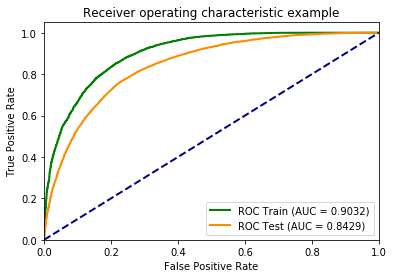

In [71]:
# Train test model
train_test_model(model_rfc_grid, vectors_train, targetpitts_train, vectors_test, targetpitts_test)

#### The performance of the best random forest with grid search is close to those of random forest without grid research and random forest with oob_score.

# NLP for Las Vegas

In [77]:
dflas['target'] = dflas['stars'] == 5
targetlas = dflas['target'].values
targetlas[:5]

array([ True,  True, False,  True, False])

In [79]:
dflas.target.mean()
# higher than pittsburgh

0.49467377923676653

In [82]:
documentslas_train, documentslas_test, targetlas_train, targetlas_test = train_test_split(
    documentslas, targetlas, test_size = 0.7, random_state = 42)

In [83]:
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000)

# Train the model with training data
vectors_train = tfidf_vectorizer.fit_transform(documentslas_train).toarray()

# Get the vocab of tfidf
wordslas = tfidf_vectorizer.get_feature_names()

# Use the trained model to transform test data
vectors_test = tfidf_vectorizer.transform(documentslas_test).toarray()

In [84]:
random_number = 20
search_query = [documentslas_test[random_number]]
print(search_query)
# shorter than pitt???

['Prime is one of my favorite places in town. I\'ve been here dozens of times and each visit has been exquisite. I always say, that for some reason, the staff at Prime seem to read my mind. Every detail here seems to be meticulously planned and executed. From the smooth, attentive, yet unobtrusive service to the sublimely prepared seafood platters or the stunning cuts of beef paired with wonderful selection of sauces and sides, I thoroughly enjoy every second here. What I love the most is that the wait staff make us feel like a million bucks from the second we are received. They never say "no". Everything can be arranged, customized or put together. I absolutely adore coming here and will most definitely continue to do so in the future.']


In [91]:
vector_search_query = tfidf_vectorizer.transform(search_query).toarray()

# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_search_query, vectors_train)

In [93]:
n = 10
top_similar_reviews = get_top_values(similarity_scores[0], n, documentslas_train)

In [94]:
print('query')
print(search_query)  

print('\n\nMost %s similar reviews:' % n)
for i, review in enumerate(top_similar_reviews):
    print('#%s:' % i)
    print(review)

query
['Prime is one of my favorite places in town. I\'ve been here dozens of times and each visit has been exquisite. I always say, that for some reason, the staff at Prime seem to read my mind. Every detail here seems to be meticulously planned and executed. From the smooth, attentive, yet unobtrusive service to the sublimely prepared seafood platters or the stunning cuts of beef paired with wonderful selection of sauces and sides, I thoroughly enjoy every second here. What I love the most is that the wait staff make us feel like a million bucks from the second we are received. They never say "no". Everything can be arranged, customized or put together. I absolutely adore coming here and will most definitely continue to do so in the future.']


Most 10 similar reviews:
#0:
This place is amazingly good and the service is just amazing! Coming here for the second time never amazes me! Will be coming back again and again in the future!
#1:
Best. Prime. Rib. Ever! Period, hands down, no c

In [85]:
model_lrc = LogisticRegression()
model_lrc.fit(vectors_train, targetlas_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
model_lrc.score(vectors_train, targetlas_train)

0.8421556558610314

In [88]:
model_lrc.score(vectors_test, targetlas_test)

0.8347382613283311

In [89]:
# Let's find it out by ranking
n = 50
get_top_values(model_lrc.coef_[0], n, wordslas)

['amazing',
 'best',
 'awesome',
 'thank',
 'delicious',
 'incredible',
 'perfect',
 'fantastic',
 'heaven',
 'excellent',
 'perfection',
 'highly',
 'great',
 'phenomenal',
 'regret',
 'love',
 'favorite',
 'die',
 'outstanding',
 'everything',
 'exceptional',
 'bomb',
 'perfectly',
 'every',
 'omg',
 'holy',
 'deserves',
 'notch',
 'glad',
 'soooo',
 'beyond',
 'absolutely',
 'reasonably',
 'impeccable',
 'fabulous',
 'thanks',
 'personable',
 'wonderful',
 'sooo',
 'loved',
 'wow',
 'superb',
 'gem',
 'definitely',
 'life',
 'blown',
 'lived',
 'five',
 'hands',
 'ever']

In [90]:
# Let's find it out by ranking
n = 30
get_bottom_values(model_lrc.coef_[0], n, wordslas)

['worst',
 'horrible',
 'ok',
 'rude',
 'mediocre',
 'disappointing',
 'terrible',
 'okay',
 'slow',
 'bland',
 'however',
 'reason',
 'poor',
 'meh',
 'awful',
 'lacking',
 'disgusting',
 'worse',
 'decent',
 'disappointment',
 'overpriced',
 'average',
 'unfortunately',
 'lacked',
 'dry',
 'bad',
 'sucks',
 'alright',
 'nothing',
 'gross']